# Imports

In [54]:

import fastf1 as ff1
from fastf1 import plotting
from fastf1 import utils
from timple.timedelta import strftimedelta
from fastf1.core import Laps
plotting.setup_mpl()
ff1.Cache.enable_cache('../cache/')
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
from plotly.subplots import make_subplots
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
import requests
import re
pio.templates.default = "plotly_dark"
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.options.display.max_rows = 75
pd.options.display.max_columns = 99

In [55]:
year = 2022
gp_round = 8
ses = 'R'

In [56]:
driver_1 = 'VER'
driver_2 = 'PER'

In [57]:
events_list = ff1.get_event_schedule(2022)[2:]
events_list_2021 = ff1.get_event_schedule(2021)[2:]
country_abbrev = ['BHR','SAU','AUS','ERO','MIA','ESP','MCO','AZE','CAN','GBR','AUT','FRA','HUN','BEL','NLD','ITA','SGP','JPN','USA','MXC','SAO','ABD']
events_list['CountryAbbreviation'] = country_abbrev

In [59]:
session = ff1.get_session(year, gp_round, ses)
session.load(weather=True, telemetry=True)

core           INFO 	Loading data for Azerbaijan Grand Prix - Race [v2.2.8]
api            INFO 	No cached data found for driver_info. Loading data...
api            INFO 	Fetching driver list...
api            INFO 	Data has been written to cache!
api            INFO 	No cached data found for timing_data. Loading data...
api            INFO 	Fetching timing data...
api            INFO 	Parsing timing data...
api            INFO 	Data has been written to cache!
api            INFO 	No cached data found for timing_app_data. Loading data...
api            INFO 	Fetching timing app data...
api            INFO 	Data has been written to cache!
core           INFO 	Processing timing data...
api            INFO 	No cached data found for session_status_data. Loading data...
api            INFO 	Fetching session status data...
api            INFO 	Data has been written to cache!
api            INFO 	No cached data found for track_status_data. Loading data...
api            INFO 	Fetching track 

In [60]:
events_list.head(10)

,RoundNumber,Country,Location,OfficialEventName,EventDate,EventName,EventFormat,Session1,Session1Date,Session2,Session2Date,Session3,Session3Date,Session4,Session4Date,Session5,Session5Date,F1ApiSupport,CountryAbbreviation
2,1,Bahrain,Sakhir,FORMULA 1 GULF AIR BAHRAIN GRAND PRIX 2022,2022-03-20 20:00:00,Bahrain Grand Prix,conventional,Practice 1,2022-03-18 15:00:00,Practice 2,2022-03-18 18:00:00,Practice 3,2022-03-19 15:00:00,Qualifying,2022-03-19 18:00:00,Race,2022-03-20 18:00:00,True,BHR
3,2,Saudi Arabia,Jeddah,FORMULA 1 STC SAUDI ARABIAN GRAND PRIX 2022,2022-03-27 22:00:00,Saudi Arabian Grand Prix,conventional,Practice 1,2022-03-25 17:00:00,Practice 2,2022-03-25 20:00:00,Practice 3,2022-03-26 17:00:00,Qualifying,2022-03-26 20:00:00,Race,2022-03-27 20:00:00,True,SAU
4,3,Australia,Melbourne,FORMULA 1 HEINEKEN AUSTRALIAN GRAND PRIX 2022,2022-04-10 17:00:00,Australian Grand Prix,conventional,Practice 1,2022-04-08 13:00:00,Practice 2,2022-04-08 16:00:00,Practice 3,2022-04-09 13:00:00,Qualifying,2022-04-09 16:00:00,Race,2022-04-10 15:00:00,True,AUS
5,4,Italy,Imola,FORMULA 1 ROLEX GRAN PREMIO DEL MADE IN ITALY ...,2022-04-24 17:00:00,Emilia Romagna Grand Prix,sprint,Practice 1,2022-04-22 13:30:00,Qualifying,2022-04-22 17:00:00,Practice 2,2022-04-23 12:30:00,Sprint,2022-04-23 16:30:00,Race,2022-04-24 15:00:00,True,ERO
6,5,United States,Miami,FORMULA 1 CRYPTO.COM MIAMI GRAND PRIX 2022,2022-05-08 17:30:00,Miami Grand Prix,conventional,Practice 1,2022-05-06 14:30:00,Practice 2,2022-05-06 17:30:00,Practice 3,2022-05-07 13:00:00,Qualifying,2022-05-07 16:00:00,Race,2022-05-08 15:30:00,True,MIA
7,6,Spain,Barcelona,FORMULA 1 PIRELLI GRAN PREMIO DE ESPAÑA 2022,2022-05-22 17:00:00,Spanish Grand Prix,conventional,Practice 1,2022-05-20 14:00:00,Practice 2,2022-05-20 17:00:00,Practice 3,2022-05-21 13:00:00,Qualifying,2022-05-21 16:00:00,Race,2022-05-22 15:00:00,True,ESP
8,7,Monaco,Monte Carlo,FORMULA 1 GRAND PRIX DE MONACO 2022,2022-05-29 17:00:00,Monaco Grand Prix,conventional,Practice 1,2022-05-27 14:00:00,Practice 2,2022-05-27 17:00:00,Practice 3,2022-05-28 13:00:00,Qualifying,2022-05-28 16:00:00,Race,2022-05-29 15:00:00,True,MCO
9,8,Azerbaijan,Baku,FORMULA 1 AZERBAIJAN GRAND PRIX 2022,2022-06-12 17:00:00,Azerbaijan Grand Prix,conventional,Practice 1,2022-06-10 15:00:00,Practice 2,2022-06-10 18:00:00,Practice 3,2022-06-11 15:00:00,Qualifying,2022-06-11 18:00:00,Race,2022-06-12 15:00:00,True,AZE
10,9,Canada,Montréal,FORMULA 1 GRAND PRIX DU CANADA 2022,2022-06-19 16:00:00,Canadian Grand Prix,conventional,Practice 1,2022-06-17 14:00:00,Practice 2,2022-06-17 17:00:00,Practice 3,2022-06-18 13:00:00,Qualifying,2022-06-18 16:00:00,Race,2022-06-19 14:00:00,True,CAN
11,10,Great Britain,Silverstone,FORMULA 1 BRITISH GRAND PRIX 2022,2022-07-03 17:00:00,British Grand Prix,conventional,Practice 1,2022-07-01 13:00:00,Practice 2,2022-07-01 16:00:00,Practice 3,2022-07-02 12:00:00,Qualifying,2022-07-02 15:00:00,Race,2022-07-03 15:00:00,True,GBR


In [61]:
session_dict = {'conventional': ['Practice 1', 'Practice 2', 'Practice 3', 'Qualifying', 'Race'],
                'sprint': ['Practice 1', 'Qualifying', 'Practice 2', 'Sprint', 'Race']}

In [62]:
results = session.results
results

,DriverNumber,BroadcastName,Abbreviation,TeamName,TeamColor,FirstName,LastName,FullName,Position,GridPosition,Q1,Q2,Q3,Time,Status,Points
1,1,M VERSTAPPEN,VER,Red Bull Racing,1e5bc6,Max,Verstappen,Max Verstappen,1.0,3.0,NaT,NaT,NaT,0 days 01:34:05.941000,Finished,25.0
11,11,S PEREZ,PER,Red Bull Racing,1e5bc6,Sergio,Perez,Sergio Perez,2.0,2.0,NaT,NaT,NaT,0 days 01:34:26.764000,Finished,19.0
63,63,G RUSSELL,RUS,Mercedes,6cd3bf,George,Russell,George Russell,3.0,5.0,NaT,NaT,NaT,0 days 01:34:51.936000,Finished,15.0
44,44,L HAMILTON,HAM,Mercedes,6cd3bf,Lewis,Hamilton,Lewis Hamilton,4.0,7.0,NaT,NaT,NaT,0 days 01:35:17.620000,Finished,12.0
10,10,P GASLY,GAS,AlphaTauri,4e7c9b,Pierre,Gasly,Pierre Gasly,5.0,6.0,NaT,NaT,NaT,0 days 01:35:23.240000,Finished,10.0
5,5,S VETTEL,VET,Aston Martin,2d826d,Sebastian,Vettel,Sebastian Vettel,6.0,9.0,NaT,NaT,NaT,0 days 01:35:30.040000,Finished,8.0
14,14,F ALONSO,ALO,Alpine,2293d1,Fernando,Alonso,Fernando Alonso,7.0,10.0,NaT,NaT,NaT,0 days 01:35:34.537000,Finished,6.0
3,3,D RICCIARDO,RIC,McLaren,f58020,Daniel,Ricciardo,Daniel Ricciardo,8.0,12.0,NaT,NaT,NaT,0 days 01:35:38.148000,Finished,4.0
4,4,L NORRIS,NOR,McLaren,f58020,Lando,Norris,Lando Norris,9.0,11.0,NaT,NaT,NaT,0 days 01:35:38.497000,Finished,2.0
31,31,E OCON,OCO,Alpine,2293d1,Esteban,Ocon,Esteban Ocon,10.0,13.0,NaT,NaT,NaT,0 days 01:34:21.569000,Finished,1.0


In [63]:
fastest_lap = session.laps.pick_fastest()
tel = fastest_lap.telemetry
tel

,Date,SessionTime,DriverAhead,DistanceToDriverAhead,Time,RPM,Speed,nGear,Throttle,Brake,DRS,Source,Distance,RelativeDistance,Status,X,Y,Z
2,2022-06-12 12:09:46.606,0 days 02:08:46.598000,,621.181389,0 days 00:00:00,11198,313,8,100,False,0,interpolation,-0.008332,-0.000001,OnTrack,1047,-597,-244
3,2022-06-12 12:09:46.660,0 days 02:08:46.652000,,621.181389,0 days 00:00:00.054000,11181,313,8,100,False,0,pos,4.684886,0.000788,OnTrack,1091,-580,-245
4,2022-06-12 12:09:46.840,0 days 02:08:46.832000,,621.181389,0 days 00:00:00.234000,11147,313,8,100,False,0,pos,20.334421,0.003421,OnTrack,1236,-520,-245
5,2022-06-12 12:09:46.940,0 days 02:08:46.932000,,621.181389,0 days 00:00:00.334000,11114,313,8,100,False,0,car,29.032222,0.004884,OnTrack,1331,-480,-244
6,2022-06-12 12:09:47.140,0 days 02:08:47.132000,1,621.181389,0 days 00:00:00.534000,11125,313,8,100,False,0,pos,46.421111,0.007810,OnTrack,1525,-400,-244
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
766,2022-06-12 12:11:32.220,0 days 02:10:32.212000,1,681.241111,0 days 00:01:45.614000,11248,318,8,100,False,0,car,5894.614444,0.991730,OnTrack,691,-747,-245
767,2022-06-12 12:11:32.440,0 days 02:10:32.432000,1,668.518889,0 days 00:01:45.834000,11225,317,8,100,False,0,pos,5913.938918,0.994981,OnTrack,882,-667,-246
768,2022-06-12 12:11:32.620,0 days 02:10:32.612000,1,655.796667,0 days 00:01:46.014000,11203,316,8,100,False,0,car,5929.725556,0.997637,OnTrack,1027,-606,-245
769,2022-06-12 12:11:32.640,0 days 02:10:32.632000,1,655.796667,0 days 00:01:46.034000,11204,316,8,100,False,0,pos,5931.480500,0.997932,OnTrack,1044,-600,-245


In [64]:
session_weather = session.weather_data
session_weather

,Time,AirTemp,Humidity,Pressure,Rainfall,TrackTemp,WindDirection,WindSpeed
0,0 days 00:00:45.873000,25.7,56.0,1010.7,False,49.2,284,0.8
1,0 days 00:01:45.871000,25.8,54.0,1010.7,False,50.1,264,0.8
2,0 days 00:02:45.872000,25.8,55.0,1010.7,False,49.5,322,0.8
3,0 days 00:03:45.884000,25.8,55.0,1010.5,False,48.9,172,1.0
4,0 days 00:04:45.872000,25.7,55.0,1010.7,False,48.8,174,0.8
...,...,...,...,...,...,...,...,...
156,0 days 02:36:46.262000,25.0,63.0,1009.0,False,44.3,285,2.2
157,0 days 02:37:46.258000,25.0,64.0,1009.2,False,44.6,303,2.5
158,0 days 02:38:46.262000,25.0,63.0,1009.2,False,44.6,264,2.0
159,0 days 02:39:46.288000,25.1,63.0,1009.2,False,44.6,276,1.7


In [65]:
# Function to format timedelta Series as string if necessary
def format_time(timedelta_series, num):
    t_list_str = []
    for i in timedelta_series:
        i = str(i)
        t_list_str.append(i[num:-3])
        
    return t_list_str

In [66]:
fastest_driver_1 = session.laps.pick_driver(driver_1).pick_fastest()
fastest_driver_2 = session.laps.pick_driver(driver_2).pick_fastest()

In [67]:
lap_1 = fastest_driver_1.telemetry

In [68]:
car_data_1 = fastest_driver_1.get_car_data().add_distance()
car_data_1['Distance'] = round(car_data_1['Distance'])
car_data_2 = fastest_driver_2.get_car_data().add_distance()
car_data_2['Distance'] = round(car_data_2['Distance'])

In [69]:
delta_time, ref_tel, compare_tel = utils.delta_time(fastest_driver_1, fastest_driver_2)
plot_title = f"{session.event.year} {session.event.EventName} - {session.name} - {driver_1} vs {driver_2}"

In [70]:
def plot_stacked_data():
    
    hovertemplate_speed = 'Speed: %{y} km/h'+'<br>Distance: %{x} meters'
    
    fig = make_subplots(specs=[[{"secondary_y": True}]])

    fig.add_trace(go.Scatter(x=car_data_1['Distance'], y=car_data_1['Speed'], name=driver_1, line_color=ff1.plotting.driver_color(driver_1), hovertemplate = hovertemplate_speed, opacity=0.8), secondary_y=False)
    fig.add_trace(go.Scatter(x=car_data_2['Distance'], y=car_data_2['Speed'], name=driver_2, line_color=ff1.plotting.driver_color(driver_2), hovertemplate = hovertemplate_speed, opacity=0.8), secondary_y=False)
    fig.add_trace(go.Scatter(x=ref_tel['Distance'], y=delta_time, line_color='white', name='Delta Time', hovertemplate = 'Delta Time: %{y:.3f} sec', opacity=0.8, line_width=1), secondary_y=True)

    fig.update_yaxes(title_text="Speed (km/h)", secondary_y=False)
    fig.update_yaxes(title_text=f"<-- {driver_2} ahead | {driver_1} ahead -->", secondary_y=True)
    fig.update_layout(width=1200, height=600, title_text=plot_title, xaxis_title='Distance (m)', title_x=0.5)
    
    return fig

plot_stacked_data()

In [71]:
def plot_unstacked_data():

    hovertemplate_speed = 'Speed: %{y} km/h'+'<br>Distance: %{x} meters'
    hovertemplate_gear = 'Gear: %{y}'+'<br>Distance: %{x} meters'
    
    fig = make_subplots(rows=3, cols=1, shared_xaxes=True, subplot_titles=('Speed', 'Gear', 'Delta Time'), vertical_spacing=0.1)

    fig.append_trace(go.Scatter(x=car_data_1['Distance'], y=car_data_1['Speed'], name=driver_1, line_color=ff1.plotting.driver_color(driver_1), hovertemplate = hovertemplate_speed, opacity=0.8), 1, 1)
    fig.append_trace(go.Scatter(x=car_data_2['Distance'], y=car_data_2['Speed'], name=driver_2, line_color=ff1.plotting.driver_color(driver_2), hovertemplate = hovertemplate_speed, opacity=0.8), 1, 1)

    fig.append_trace(go.Scatter(x=car_data_1['Distance'], y=car_data_1['nGear'], name=driver_1, line_color=ff1.plotting.driver_color(driver_1), hovertemplate = hovertemplate_gear, opacity=0.8, showlegend=False), 2, 1)
    fig.append_trace(go.Scatter(x=car_data_2['Distance'], y=car_data_2['nGear'], name=driver_2, line_color=ff1.plotting.driver_color(driver_2), hovertemplate = hovertemplate_gear, opacity=0.8, showlegend=False), 2, 1)

    fig.append_trace(go.Scatter(x=ref_tel['Distance'], y=delta_time, line_color='white', mode='lines', name='Delta Time', hovertemplate = 'Delta Time: %{y:.3f} sec', opacity=0.8), 3, 1)

    fig.update_yaxes(title_text="Speed (km/h)", row=1, col=1)
    fig.update_yaxes(title_text="Gear", row=2, col=1)
    fig.update_yaxes(title_text=f"<-- {driver_2} ahead | {driver_1} ahead -->", row=3, col=1)
    fig.update_xaxes(title_text="Distance (m)", row=3, col=1)

    fig.update_layout(width=1200, height=1200, title_text=plot_title, title_x=0.1)
    return fig

plot_unstacked_data()

In [72]:
# Returns only laps quicker than 107% of the quickest lap of the session, removing outlaps and inlaps.
session.laps.pick_quicklaps()

,Time,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,Sector3Time,Sector1SessionTime,Sector2SessionTime,Sector3SessionTime,SpeedI1,SpeedI2,SpeedFL,SpeedST,IsPersonalBest,Compound,TyreLife,FreshTyre,LapStartTime,Team,Driver,TrackStatus,IsAccurate,LapStartDate
1,0 days 01:06:38.629000,1,0 days 00:01:48.954000,2,1,NaT,NaT,0 days 00:00:39.324000,0 days 00:00:44.058000,0 days 00:00:25.572000,0 days 01:05:28.999000,0 days 01:06:13.057000,0 days 01:06:38.629000,NaN,211.0,324.0,320.0,False,MEDIUM,2.0,True,0 days 01:04:49.675000,Red Bull Racing,VER,1,True,2022-06-12 11:05:49.683
2,0 days 01:08:27.319000,1,0 days 00:01:48.690000,3,1,NaT,NaT,0 days 00:00:39.084000,0 days 00:00:44.010000,0 days 00:00:25.596000,0 days 01:07:17.713000,0 days 01:08:01.723000,0 days 01:08:27.319000,199.0,207.0,327.0,320.0,False,MEDIUM,3.0,True,0 days 01:06:38.629000,Red Bull Racing,VER,1,True,2022-06-12 11:07:38.637
3,0 days 01:10:15.567000,1,0 days 00:01:48.248000,4,1,NaT,NaT,0 days 00:00:38.711000,0 days 00:00:44.142000,0 days 00:00:25.395000,0 days 01:09:06.030000,0 days 01:09:50.172000,0 days 01:10:15.567000,196.0,214.0,342.0,321.0,False,MEDIUM,4.0,True,0 days 01:08:27.319000,Red Bull Racing,VER,1,True,2022-06-12 11:09:27.327
4,0 days 01:12:03.879000,1,0 days 00:01:48.312000,5,1,NaT,NaT,0 days 00:00:38.829000,0 days 00:00:44.115000,0 days 00:00:25.368000,0 days 01:10:54.396000,0 days 01:11:38.511000,0 days 01:12:03.879000,200.0,217.0,344.0,322.0,False,MEDIUM,5.0,True,0 days 01:10:15.567000,Red Bull Racing,VER,1,True,2022-06-12 11:11:15.575
5,0 days 01:13:52.445000,1,0 days 00:01:48.566000,6,1,NaT,NaT,0 days 00:00:38.928000,0 days 00:00:44.225000,0 days 00:00:25.413000,0 days 01:12:42.807000,0 days 01:13:27.032000,0 days 01:13:52.445000,197.0,211.0,343.0,322.0,False,MEDIUM,6.0,True,0 days 01:12:03.879000,Red Bull Racing,VER,1,True,2022-06-12 11:13:03.887
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884,0 days 01:10:18.497000,55,0 days 00:01:49.054000,4,1,NaT,NaT,0 days 00:00:39.040000,0 days 00:00:44.282000,0 days 00:00:25.732000,0 days 01:09:08.483000,0 days 01:09:52.765000,0 days 01:10:18.497000,206.0,213.0,316.0,317.0,False,MEDIUM,4.0,True,0 days 01:08:29.443000,Ferrari,SAI,1,True,2022-06-12 11:09:29.451
885,0 days 01:12:07.502000,55,0 days 00:01:49.005000,5,1,NaT,NaT,0 days 00:00:38.957000,0 days 00:00:44.282000,0 days 00:00:25.766000,0 days 01:10:57.454000,0 days 01:11:41.736000,0 days 01:12:07.502000,NaN,215.0,316.0,317.0,False,MEDIUM,5.0,True,0 days 01:10:18.497000,Ferrari,SAI,1,True,2022-06-12 11:11:18.505
886,0 days 01:13:56.671000,55,0 days 00:01:49.169000,6,1,NaT,NaT,0 days 00:00:39.044000,0 days 00:00:44.344000,0 days 00:00:25.781000,0 days 01:12:46.546000,0 days 01:13:30.890000,0 days 01:13:56.671000,213.0,212.0,314.0,317.0,False,MEDIUM,6.0,True,0 days 01:12:07.502000,Ferrari,SAI,1,True,2022-06-12 11:13:07.510
887,0 days 01:15:45.931000,55,0 days 00:01:49.260000,7,1,NaT,NaT,0 days 00:00:39.056000,0 days 00:00:44.410000,0 days 00:00:25.794000,0 days 01:14:35.727000,0 days 01:15:20.137000,0 days 01:15:45.931000,202.0,212.0,315.0,316.0,False,MEDIUM,7.0,True,0 days 01:13:56.671000,Ferrari,SAI,1,True,2022-06-12 11:14:56.679


In [73]:
lap_1 = fastest_driver_1.telemetry
lap_2 = fastest_driver_2.telemetry
lap_1 = lap_1[lap_1['Source'] != 'pos'].reset_index(drop=True)
lap_2 = lap_2[lap_2['Source'] != 'pos'].reset_index(drop=True)

In [74]:
start_line_dict = {1: [120, 1280, '^'],
                   2: [-1341, 2800, '<'],
                   3: [-1228, 100, '<'],
                   4: [-1533, -650, '<'],
                   5: [2633, 128, '>'],
                   6: [25, -469, '<'],
                   7: [-8065, -6549, '^'],
                   8: [700, 350, '>'],
}

for i in range(1,23):
    if i in start_line_dict:
        continue
    else:
        start_line_dict[i] = [0, 0, '<']
    
start_line_dict

{1: [120, 1280, '^'],
 2: [-1341, 2800, '<'],
 3: [-1228, 100, '<'],
 4: [-1533, -650, '<'],
 5: [2633, 128, '>'],
 6: [25, -469, '<'],
 7: [-8065, -6549, '^'],
 8: [700, 350, '>'],
 9: [0, 0, '<'],
 10: [0, 0, '<'],
 11: [0, 0, '<'],
 12: [0, 0, '<'],
 13: [0, 0, '<'],
 14: [0, 0, '<'],
 15: [0, 0, '<'],
 16: [0, 0, '<'],
 17: [0, 0, '<'],
 18: [0, 0, '<'],
 19: [0, 0, '<'],
 20: [0, 0, '<'],
 21: [0, 0, '<'],
 22: [0, 0, '<']}

In [75]:
colormap_speed = mpl.cm.RdYlGn
colormap_gear = mpl.cm.get_cmap('RdYlGn', 8)
points = np.array([lap_1['X'], lap_1['Y']]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)
start_x = points[0][0][0]
start_y = points[0][0][1]
direction_x = start_line_dict[gp_round][0]
direction_y = start_line_dict[gp_round][1]
direction_marker = start_line_dict[gp_round][2]
pix = 1/plt.rcParams['figure.dpi']

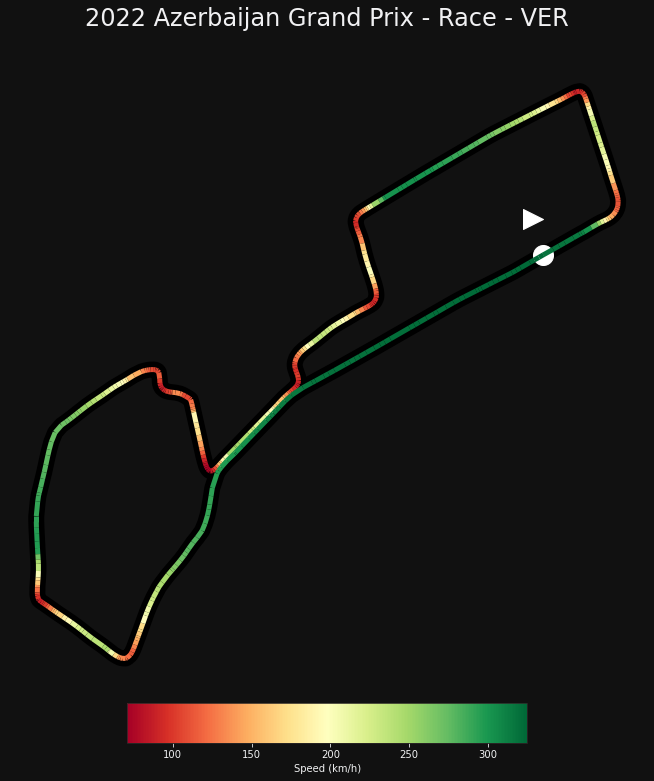

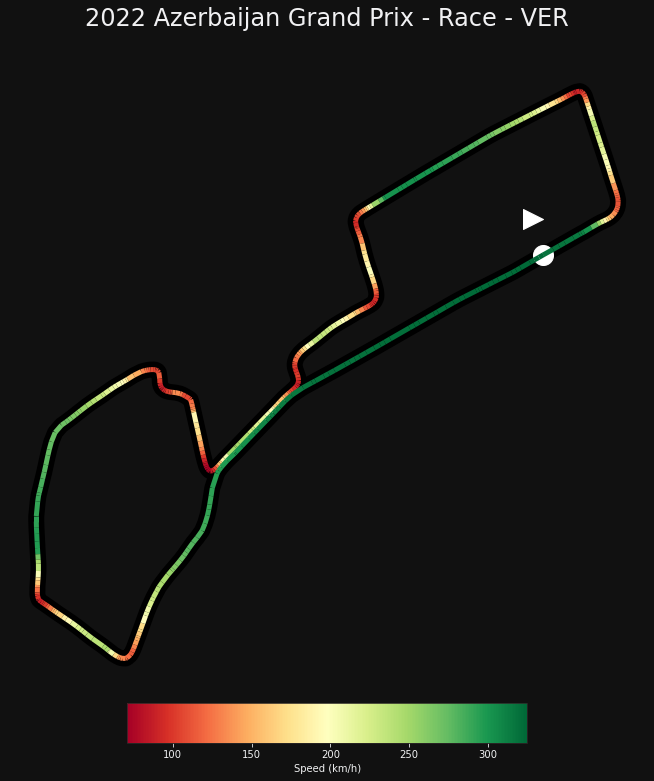

In [76]:
def plot_track_speed():

    # Setup plot
    fig, ax = plt.subplots(sharex=True, sharey=True, figsize=(800*pix, 800*pix))
    fig.suptitle(f"{session.event.year} {session.event.EventName} - {session.name} - {driver_1}", size=24, y=0.97)

    # Adjust margins and turn of axis
    plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.12)
    ax.axis('off')

    # After this, we plot the data itself.
    # Create background track line
    ax.plot(lap_1['X'], lap_1['Y'], color='black', linestyle='-', linewidth=16, zorder=1)

    # Add start line marker
    plt.scatter(start_x, start_y, color='white', s=400, zorder=1)
    plt.scatter(direction_x, direction_y, color='white', s=400, zorder=1, marker=direction_marker)

    # Create a continuous norm to map from data points to colors
    norm = plt.Normalize(lap_1['Speed'].min(), lap_1['Speed'].max())
    lc = LineCollection(segments, cmap=colormap_speed, norm=norm, linestyle='-', linewidth=5)

    # Set the values used for colormapping
    lc.set_array(lap_1['Speed'])

    # Merge all line segments together
    line = ax.add_collection(lc)

    # Finally, we create a color bar as a legend.
    cbaxes = fig.add_axes([0.25, 0.05, 0.5, 0.05])
    normlegend = mpl.colors.Normalize(vmin=lap_1['Speed'].min(), vmax=lap_1['Speed'].max())
    legend = mpl.colorbar.ColorbarBase(cbaxes, norm=normlegend, cmap=colormap_speed, orientation="horizontal", label='Speed (km/h)')

    # Set background color to transparent
    # fig.patch.set_alpha(0)
    fig.patch.set_facecolor('#111111')

    # Show the plot
    return fig

plot_track_speed()

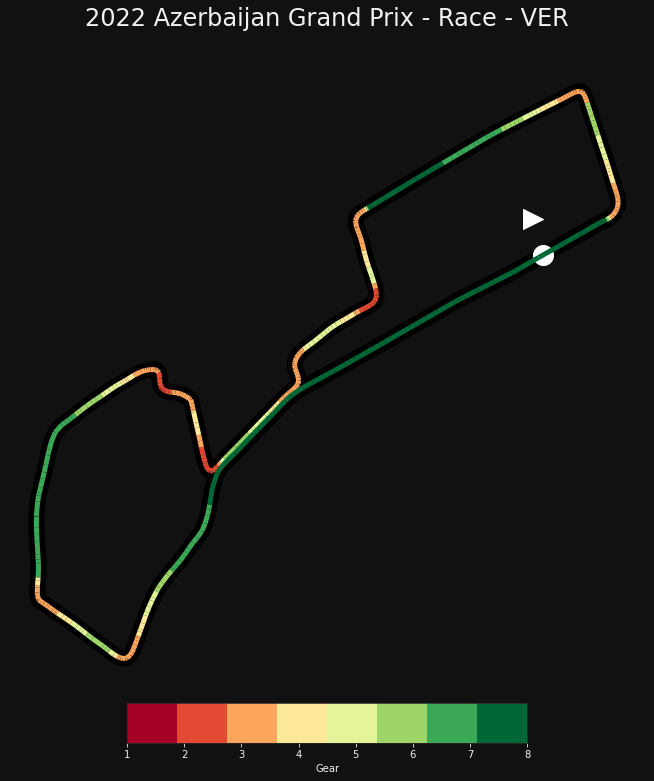

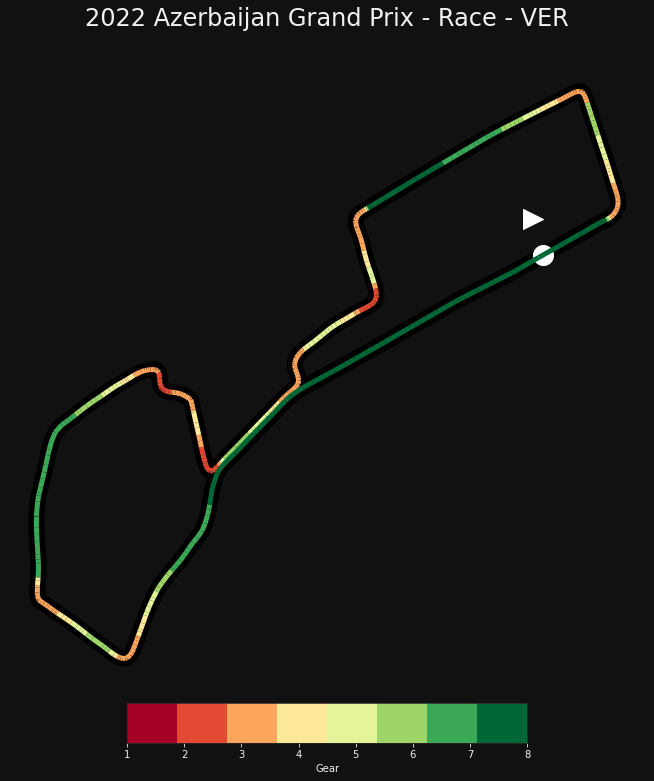

In [77]:
def plot_track_gear():

    # Setup plot
    fig, ax = plt.subplots(sharex=True, sharey=True, figsize=(800*pix, 800*pix))
    fig.suptitle(f"{session.event.year} {session.event.EventName} - {session.name} - {driver_1}", size=24, y=0.97)

    # Adjust margins and turn of axis
    plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.12)
    ax.axis('off')

    # After this, we plot the data itself.
    # Create background track line
    ax.plot(lap_1['X'], lap_1['Y'], color='black', linestyle='-', linewidth=16, zorder=1)

    # Add start line marker
    plt.scatter(start_x, start_y, color='white', s=400, zorder=1)
    plt.scatter(direction_x, direction_y, color='white', s=400, zorder=1, marker=direction_marker)

    # Create a norm to map from data points to colors
    norm = plt.Normalize(1, colormap_gear.N+1)
    lc = LineCollection(segments, cmap=colormap_gear, norm=norm, linestyle='-', linewidth=5)

    # Set the values used for colormapping
    lc.set_array(lap_1['nGear'].to_numpy().astype(float))

    # Merge all line segments together
    line = ax.add_collection(lc)

    # Create a color bar as a legend
    cbaxes = fig.add_axes([0.25, 0.05, 0.5, 0.05])
    normlegend = mpl.colors.Normalize(vmin=1, vmax=8)
    legend = mpl.colorbar.ColorbarBase(cbaxes, norm=normlegend, cmap=colormap_gear, orientation="horizontal", label='Gear')

    # Set background color to transparent
    # fig.patch.set_alpha(0)
    fig.patch.set_facecolor('#111111')

    # Show the plot
    return fig

plot_track_gear()

In [78]:
def delta_bounds(vmin, vmax):
    if abs(vmin) < abs(vmax):
        vmin = -(vmax)
    else:
        vmax = -(vmin)
    return vmin, vmax

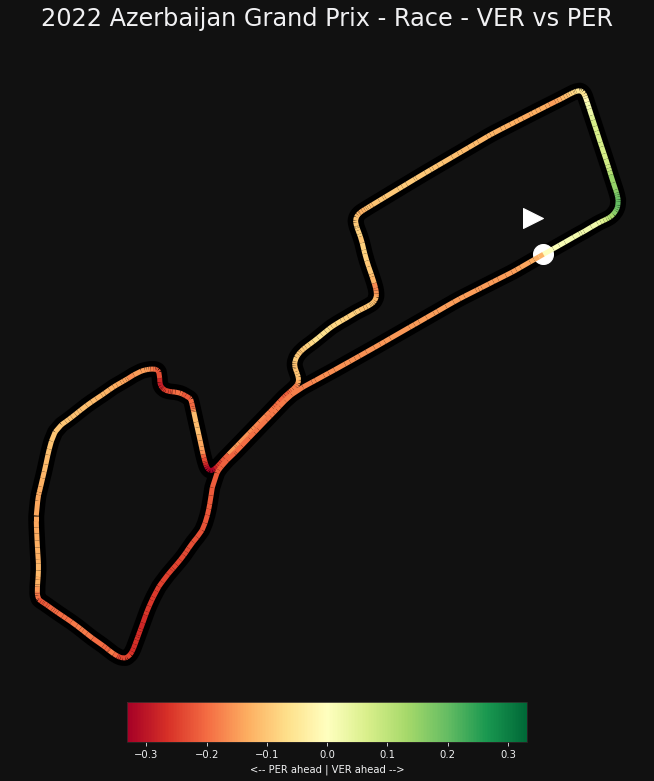

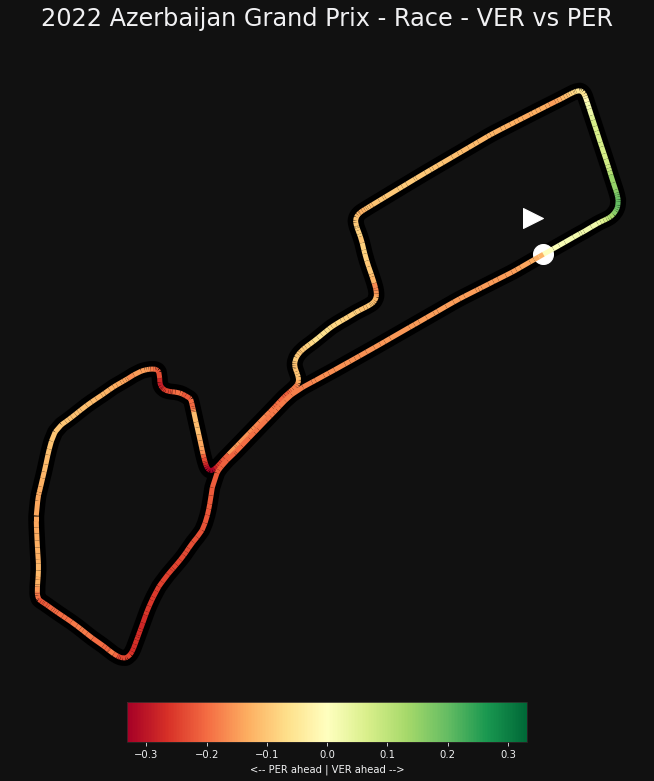

In [79]:
def plot_track_delta():

    # Determine boundaries for the colorbar
    vmin, vmax = delta_bounds(delta_time.min(), delta_time.max())

    # Setup plot
    fig, ax = plt.subplots(sharex=True, sharey=True, figsize=(800*pix, 800*pix))
    fig.suptitle(f"{session.event.year} {session.event.EventName} - {session.name} - {driver_1} vs {driver_2}", size=24, y=0.97)

    # Adjust margins and turn of axis
    plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.12)
    ax.axis('off')

    # After this, we plot the data itself.
    # Create background track line
    ax.plot(lap_1['X'], lap_1['Y'], color='black', linestyle='-', linewidth=16, zorder=1)

    # Add start line marker
    plt.scatter(start_x, start_y, color='white', s=400, zorder=1)
    plt.scatter(direction_x, direction_y, color='white', s=400, zorder=1, marker=direction_marker)

    # Create a continuous norm to map from data points to colors
    norm = plt.Normalize(vmin, vmax)
    lc = LineCollection(segments, cmap=colormap_speed, norm=norm, linestyle='-', linewidth=5)

    # Set the values used for colormapping
    lc.set_array(delta_time)

    # Merge all line segments together
    line = ax.add_collection(lc)

    # Finally, we create a color bar as a legend.
    cbaxes = fig.add_axes([0.25, 0.05, 0.5, 0.05])
    normlegend = mpl.colors.Normalize(vmin=vmin, vmax=vmax)
    legend = mpl.colorbar.ColorbarBase(cbaxes, norm=normlegend, cmap=colormap_speed, orientation="horizontal", label=f"<-- {driver_2} ahead | {driver_1} ahead -->")

    # Set background color to transparent
    # fig.patch.set_alpha(0)
    fig.patch.set_facecolor('#111111')

    # Show the plot
    return fig

plot_track_delta()

In [80]:
race = session.laps
race = race.sort_values('Time').reset_index(drop=True)

# Tests

In [81]:
# Ergast API base request
def ergast_retrieve(api_endpoint: str):
    url = f'https://ergast.com/api/f1/{api_endpoint}.json'
    response = requests.get(url).json()
    
    return response['MRData']

In [82]:
# Get drivers standings
def update_driver_standings(rounds):
    standings_dict = {}
    for i in range(1, rounds+1):
        try:
            r = ergast_retrieve(f'current/{i}/driverStandings')
            standings = r['StandingsTable']['StandingsLists'][0]['DriverStandings']
            for j in standings:
                if j['Driver']['code'] not in standings_dict:
                    if i > 1:
                        num = i - 1
                        standings_dict[j['Driver']['code']] = [0] * num
                        standings_dict[j['Driver']['code']].append(j['points'])
                    else:
                        standings_dict[j['Driver']['code']] = [j['points']]
                else:
                    if len(standings_dict[j['Driver']['code']]) < (i - 1):
                        num_missing = (i + 1) - len(standings_dict[j['Driver']['code']])
                        print(num_missing)
                        standings_dict[j['Driver']['code']] = standings_dict[j['Driver']['code']] + [0] * num_missing
                        standings_dict[j['Driver']['code']].append(j['points'])
                    else:
                        standings_dict[j['Driver']['code']].append(j['points'])
        except IndexError:
            break
    
    df_drivers = pd.DataFrame.from_dict(standings_dict, orient='index')
    df_drivers.columns = df_drivers.columns + 1
    df_drivers[df_drivers.columns] = df_drivers[df_drivers.columns].apply(pd.to_numeric)
    df_drivers.sort_values(by=df_drivers.columns[-1], ascending=False, inplace=True)
    return df_drivers

df_drivers = update_driver_standings(22)
df_drivers.to_csv('../data/drivers_standings.csv')

In [83]:
# Get constructors standings
def update_constructor_standings(rounds):
    standings_dict = {}
    for i in range(1, rounds+1):
        try:
            r = ergast_retrieve(f'current/{i}/constructorStandings')
            standings = r['StandingsTable']['StandingsLists'][0]['ConstructorStandings']
            for i in standings:
                if i['Constructor']['name'] not in standings_dict:
                    standings_dict[i['Constructor']['name']] = [i['points']]
                else:
                    standings_dict[i['Constructor']['name']].append(i['points'])
        except IndexError:
            break
        
    df_constructors = pd.DataFrame.from_dict(standings_dict, orient='index')
    df_constructors.columns = df_constructors.columns + 1
    df_constructors[df_constructors.columns] = df_constructors[df_constructors.columns].apply(pd.to_numeric)
    df_constructors.sort_values(by=df_constructors.columns[-1], ascending=False, inplace=True)
    return df_constructors

df_constructors = update_constructor_standings(22)
df_constructors.to_csv('../data/constructors_standings.csv')

In [84]:
df_drivers_standings = pd.read_csv('../data/drivers_standings.csv', index_col=0)
df_drivers_standings

,1,2,3,4,5,6,7,8
VER,0,25,25,59,85,110,125,150
PER,0,12,30,54,66,85,110,129
LEC,26,45,71,86,104,104,116,116
RUS,12,22,37,49,59,74,84,99
SAI,18,33,33,38,53,65,83,83
HAM,15,16,28,28,36,46,50,62
NOR,0,6,16,35,35,39,48,50
BOT,8,8,12,24,30,38,40,40
OCO,6,14,20,20,24,30,30,31
GAS,0,4,6,6,6,6,6,16


In [85]:
def get_round_mapping():
    '''
    Returns a round to event name mapping dictionary
    '''
    round_mapping = {}
    for i in events_list.itertuples():
        round_mapping[str(i.RoundNumber)] = i.CountryAbbreviation
    return round_mapping

In [86]:
df_colors = pd.read_csv('../data/drivers_info.csv', index_col=0)

def plot_compare_points():
    
    round_mapping = get_round_mapping() 
    df_drivers = pd.read_csv('../data/drivers_standings.csv', index_col=0)
    df_colors = pd.read_csv('../data/drivers_info.csv', index_col=0)

    df_drivers_line = df_drivers[(df_drivers.index == driver_1) | (df_drivers.index == driver_2)].transpose().reset_index().rename(columns={'index': 'Round'})
    df_drivers_line['country'] = df_drivers_line['Round'].map(round_mapping)
    df_drivers_line

    driver_1_team_color = '#' + df_colors[df_colors['Abbreviation'] == driver_1].values[0][4]
    driver_2_team_color = '#' + df_colors[df_colors['Abbreviation'] == driver_2].values[0][4]
    hovertemplate = 'Points: %{y}'

    fig = go.Figure()

    fig.add_trace(go.Scatter(x=df_drivers_line['country'], y=df_drivers_line[driver_1], name=driver_1, line_color=driver_1_team_color, hovertemplate=hovertemplate))
    fig.add_trace(go.Scatter(x=df_drivers_line['country'], y=df_drivers_line[driver_2], name=driver_2, line_color=driver_2_team_color, hovertemplate=hovertemplate))

    fig.update_xaxes(tickangle=45)
    fig.update_layout(width= 800, height = 600, title_text=f"Current Standings - {driver_1} vs {driver_2}", yaxis_title="Points", title_x=0.5)
    return fig

In [87]:
plot_compare_points()

In [88]:
df_constructors_standings = pd.read_csv('../data/constructors_standings.csv', index_col=0)
df_constructors_standings

,1,2,3,4,5,6,7,8
Red Bull,0,37,55,113,151,195,235,279
Ferrari,44,78,104,124,157,169,199,199
Mercedes,27,38,65,77,95,120,134,161
McLaren,0,6,24,46,46,50,59,65
Alpine F1 Team,8,16,22,22,26,34,40,47
Alfa Romeo,9,9,13,25,31,39,41,41
AlphaTauri,4,8,10,16,16,17,17,27
Haas F1 Team,10,12,12,15,15,15,15,15
Aston Martin,0,0,0,5,6,6,7,15
Williams,0,0,1,1,3,3,3,3


In [89]:
df_drivers_standings_test = pd.read_csv('../data/drivers_standings.csv', index_col=0)
df_drivers_standings

,1,2,3,4,5,6,7,8
VER,0,25,25,59,85,110,125,150
PER,0,12,30,54,66,85,110,129
LEC,26,45,71,86,104,104,116,116
RUS,12,22,37,49,59,74,84,99
SAI,18,33,33,38,53,65,83,83
HAM,15,16,28,28,36,46,50,62
NOR,0,6,16,35,35,39,48,50
BOT,8,8,12,24,30,38,40,40
OCO,6,14,20,20,24,30,30,31
GAS,0,4,6,6,6,6,6,16


In [103]:
def get_drivers_standings_df():
    
    df = pd.read_csv('https://f1-jedha-bucket.s3.eu-west-3.amazonaws.com/data/constructors_standings.csv', index_col=0)
    round_mapping = {}
    for i in events_list.itertuples():
        round_mapping[str(i.RoundNumber)] = i.CountryAbbreviation
        
    df.columns = df.columns.map(round_mapping)
    return df

def get_constructors_standings_df():
    
    df = pd.read_csv('https://f1-jedha-bucket.s3.eu-west-3.amazonaws.com/data/constructors_standings.csv', index_col=0)
    round_mapping = {}
    for i in events_list.itertuples():
        round_mapping[str(i.RoundNumber)] = i.CountryAbbreviation
        
    df.columns = df.columns.map(round_mapping)
    return df

In [104]:
get_drivers_standings_df()

,BHR,SAU,AUS,ERO,MIA,ESP,MCO,AZE
Red Bull,0,37,55,113,151,195,235,279
Ferrari,44,78,104,124,157,169,199,199
Mercedes,27,38,65,77,95,120,134,161
McLaren,0,6,24,46,46,50,59,65
Alpine F1 Team,8,16,22,22,26,34,40,47
Alfa Romeo,9,9,13,25,31,39,41,41
AlphaTauri,4,8,10,16,16,17,17,27
Haas F1 Team,10,12,12,15,15,15,15,15
Aston Martin,0,0,0,5,6,6,7,15
Williams,0,0,1,1,3,3,3,3


In [105]:
get_constructors_standings_df()

,BHR,SAU,AUS,ERO,MIA,ESP,MCO,AZE
Red Bull,0,37,55,113,151,195,235,279
Ferrari,44,78,104,124,157,169,199,199
Mercedes,27,38,65,77,95,120,134,161
McLaren,0,6,24,46,46,50,59,65
Alpine F1 Team,8,16,22,22,26,34,40,47
Alfa Romeo,9,9,13,25,31,39,41,41
AlphaTauri,4,8,10,16,16,17,17,27
Haas F1 Team,10,12,12,15,15,15,15,15
Aston Martin,0,0,0,5,6,6,7,15
Williams,0,0,1,1,3,3,3,3


In [93]:
def format_results_race(session_type):
    '''
    Returns a formatted session results dataframe
    '''    
    results = session.results    
    if session_type == 'Race' or session_type == 'Sprint':
        # Get the results table, convert it to a dataframe and set the numeric columns to int        
        results_formatted = pd.DataFrame(results[['FullName','TeamName','Position','GridPosition','Time','Status','Points']].copy())
        results_formatted[['Points', 'Position', 'GridPosition']] = results_formatted[['Points', 'Position', 'GridPosition']].astype(int)
        results_formatted = results_formatted.rename(columns = {'FullName': 'Name'})
        
        # Compute time difference at finish
        time_difference = []
        time_1 = results_formatted['Time'][0]
        for i in results_formatted.itertuples():
            time_difference.append(i.Time - time_1)
            
        time_difference[0] = results_formatted['Time'][0]
        results_formatted['TimeDifference'] = time_difference
        
        # Format the time data as string
        time_str = []
        for i in results_formatted.itertuples():
            if i.Status == 'Finished':
                time = str(i.TimeDifference)
                time_str.append(time[8:-3])
            elif 'Lap' in i.Status:
                time_str.append(i.Status)
            else:
                time_str.append('DNF')
                
        results_formatted['TimeStr'] = time_str
        
        # Format the time data correctly
        time_str_2 = []
        for i in results_formatted.itertuples():
            if i.Position == 1 or len(i.TimeStr) != 11:
                time_str_2.append(i.TimeStr)
            elif len(i.TimeStr) == 11:
                time_subbed = '+' + i.TimeStr[3:]
                time_str_2.append(time_subbed)
                
        results_formatted['TimeFinish'] = time_str_2
        
        # Drop unnecessary columns
        results_formatted.drop(columns=['Status', 'Time', 'TimeStr', 'TimeDifference'], inplace=True)
        return results_formatted
        
    elif session_type == 'Qualifying':
        results_formatted = pd.DataFrame(results.copy())
        temp_q1 = format_time(results['Q1'], 11)
        results_formatted['Q1_time'] = temp_q1
        temp_q2 = format_time(results['Q2'], 11)
        results_formatted['Q2_time'] = temp_q2
        temp_q3 = format_time(results['Q3'], 11)
        results_formatted['Q3_time'] = temp_q3        
        results_formatted = results_formatted[['FullName','TeamName','Position','Q1_time','Q2_time','Q3_time']]
        results_formatted = results_formatted.rename(columns = {'FullName': 'Name'})
        results_formatted['Position'] = results_formatted['Position'].astype(int)
        return results_formatted
    

In [94]:
session.results

,DriverNumber,BroadcastName,Abbreviation,TeamName,TeamColor,FirstName,LastName,FullName,Position,GridPosition,Q1,Q2,Q3,Time,Status,Points
1,1,M VERSTAPPEN,VER,Red Bull Racing,1e5bc6,Max,Verstappen,Max Verstappen,1.0,3.0,NaT,NaT,NaT,0 days 01:34:05.941000,Finished,25.0
11,11,S PEREZ,PER,Red Bull Racing,1e5bc6,Sergio,Perez,Sergio Perez,2.0,2.0,NaT,NaT,NaT,0 days 01:34:26.764000,Finished,19.0
63,63,G RUSSELL,RUS,Mercedes,6cd3bf,George,Russell,George Russell,3.0,5.0,NaT,NaT,NaT,0 days 01:34:51.936000,Finished,15.0
44,44,L HAMILTON,HAM,Mercedes,6cd3bf,Lewis,Hamilton,Lewis Hamilton,4.0,7.0,NaT,NaT,NaT,0 days 01:35:17.620000,Finished,12.0
10,10,P GASLY,GAS,AlphaTauri,4e7c9b,Pierre,Gasly,Pierre Gasly,5.0,6.0,NaT,NaT,NaT,0 days 01:35:23.240000,Finished,10.0
5,5,S VETTEL,VET,Aston Martin,2d826d,Sebastian,Vettel,Sebastian Vettel,6.0,9.0,NaT,NaT,NaT,0 days 01:35:30.040000,Finished,8.0
14,14,F ALONSO,ALO,Alpine,2293d1,Fernando,Alonso,Fernando Alonso,7.0,10.0,NaT,NaT,NaT,0 days 01:35:34.537000,Finished,6.0
3,3,D RICCIARDO,RIC,McLaren,f58020,Daniel,Ricciardo,Daniel Ricciardo,8.0,12.0,NaT,NaT,NaT,0 days 01:35:38.148000,Finished,4.0
4,4,L NORRIS,NOR,McLaren,f58020,Lando,Norris,Lando Norris,9.0,11.0,NaT,NaT,NaT,0 days 01:35:38.497000,Finished,2.0
31,31,E OCON,OCO,Alpine,2293d1,Esteban,Ocon,Esteban Ocon,10.0,13.0,NaT,NaT,NaT,0 days 01:34:21.569000,Finished,1.0


In [95]:
def add_driver_info(session):
    drivers_info = pd.read_csv('../data/drivers_info.csv', index_col=0)
    drivers_standings = pd.read_csv('../data/drivers_standings.csv', index_col=0)
    missing_drivers = [x for x in drivers_standings.index.tolist() if x not in drivers_info['Abbreviation'].tolist()]
    if len(missing_drivers) > 0:
        df = session.results.copy().drop(columns=["Position", "GridPosition", "Q1", "Q2", "Q3", "Time", "Status", "Points"])
        for i in missing_drivers:
            df_missing = df[df['Abbreviation'] == i]
            df_full = pd.concat([drivers_info, df_missing])
        df_full.to_csv('../data/drivers_info.csv')
        
add_driver_info(session)

In [96]:




# def champ_pos(drv):

#Récupération des noms et des couleurs à partir d'une course

drv = pd.read_csv('../data/drivers_standings.csv', index_col=0)
drivers_info = pd.read_csv('../data/drivers_info.csv', index_col=0)


# #Jointure entre les deux dataframe

df_class = drivers_info.merge(drv, how='right', left_on = ['Abbreviation'], right_index = True).reset_index()
df_class

#Modifie le dataframe pour avoir les courses en lignes

nb = len(drv.transpose())+1
df_final = pd.DataFrame(columns=['DriverNumber', 'BroadcastName', 'Abbreviation', 'TeamName', 'TeamColor', 'FirstName', 'LastName', 'FullName','Points', 'Race'])
for i in range(1,nb):
    df_class_ligne = df_class.loc[:,['DriverNumber', 'BroadcastName', 'Abbreviation', 'TeamName', 'TeamColor', 'FirstName', 'LastName', 'FullName',str(i)]]
    df_class_ligne['Race'] = i
    df_class_ligne.rename(columns={str(i): 'Points'}, inplace = True)
    df_final = pd.concat([df_final, df_class_ligne])
    
df_final.reset_index(drop = True, inplace = True)


#Ajoute une colonne classement avec la position au championnat à l'issue de chaque course

df_final = df_final.sort_values(by=['Race', 'Points'], ascending = [True, False])
df_final['classement']=len(drv)
longueur = len(df_final)
df_final.iloc[0,10] = 1

for i in range(1,longueur -1):
    if df_final.iloc[i,9] == df_final.iloc[i-1,9]:
        df_final.iloc[i,10] = df_final.iloc[i-1,10] +  1
    else :
        df_final.iloc[i,10] = 1
        
        
# #Génère une course 0 avec le classement cumulé de la dernière (permet de mettre les pilotes dans l'ordre du dernier classement)

df_init = df_final[df_final['Race']==nb-1].copy()
df_init['Race'] = 0
df_init['Points'] = 0

df_final = pd.concat([df_final, df_init])
        
# Paramétrage du dictionnaire des couleurs

colorMap ={}
df_class = pd.DataFrame(df_class)

for i in df_class.itertuples() :
    colorMap[i.Abbreviation] = '#' + i.TeamColor
        
        
#Création du graphique


#def champ_pos(df_final):

df_final = df_final.sort_values(by=['Race', 'classement'], ascending = [True, True])

maxY = df_final['Points'].max() + 20

fig = px.bar(df_final, x="Abbreviation", y="Points",  color = "Abbreviation", color_discrete_map = colorMap, animation_frame="Race", 
            labels=dict(Abbreviation="Name", classement="Ranking", FullName = "Pilot"), width = 1000, height=800, text = df_final['classement'])


fig.update_layout(title_text='Evolution of points in the championship', title_x=0.5, transition = {'duration': 1000}, showlegend = False)

fig.update_traces(textposition='inside', hovertemplate='Points: %{y}' )

fig.update_yaxes(range=[0, maxY])

fig.show()

In [97]:
def fastest_lap_comparison(fastest_laps):
    # Pass session.laps.pick_fastest() as argument when calling the function
    '''
    Plots the comparison of the best lap times of the selected session
    '''
    drivers = session.laps.pick_quicklaps()['Driver'].unique()

    list_fastest_laps = []
    for drv in drivers:
        drvs_fastest_lap = session.laps.pick_quicklaps().pick_driver(drv).pick_fastest()
        list_fastest_laps.append(drvs_fastest_lap)
    fastest_laps = Laps(list_fastest_laps).sort_values(by='LapTime').reset_index(drop=True)

    pole_lap = fastest_laps.pick_fastest()
    fastest_laps['LapTimeDelta'] = fastest_laps['LapTime'] - pole_lap['LapTime']

    fastest_laps_final = fastest_laps.dropna(subset=['Time']).copy()

    teamcol = {}
    df_results = pd.DataFrame(session.results)

    for i in df_results.itertuples():
        if i.Abbreviation in fastest_laps_final['Driver'].unique():        
            teamcol[i.Abbreviation] = '#' + i.TeamColor    

    timestr = format_time(fastest_laps_final['LapTimeDelta'],13)
    timelap = format_time(fastest_laps_final['LapTime'],11)

    fastest_laps_final['Delta'] = timestr
    fastest_laps_final['BestLapstr'] = timelap
    fastest_laps_final['Delta'] = fastest_laps_final['Delta'].apply(lambda x: x + ' sec')
    fastest_laps_final['BestLapstr'] = fastest_laps_final['BestLapstr'].apply(lambda x: x + ' sec')

    plot_title = f"{session.event.year} {session.event.EventName} - {session.name} - Fastest Lap : {fastest_laps_final['BestLapstr'].iloc[0]} - {fastest_laps_final['Driver'].iloc[0]}"

    fig = px.bar(fastest_laps_final, 
                x="LapTimeDelta", 
                y="Driver", 
                color='Driver',
                color_discrete_map=teamcol ,
                orientation='h',
                width=1000, height=600,
                template='plotly_dark',
                hover_data={'Delta':True,'LapTimeDelta':False})

    fig.update_layout(showlegend=False, title_text=plot_title)
    fig.update_xaxes(visible=False)
    fig.update_yaxes(categoryorder='total descending')

    return fig

In [98]:
fastest_lap_comparison(session.laps.pick_fastest())